### 初始

对于函数$f(x)$
$$
f(x) = \sin(kx)
$$

其中, $k$为波数, 其定义为:
$$
k = \frac{2\pi}{\lambda}
$$
即一个长度$2\pi$内的包含完整长度波长$\lambda$的数量

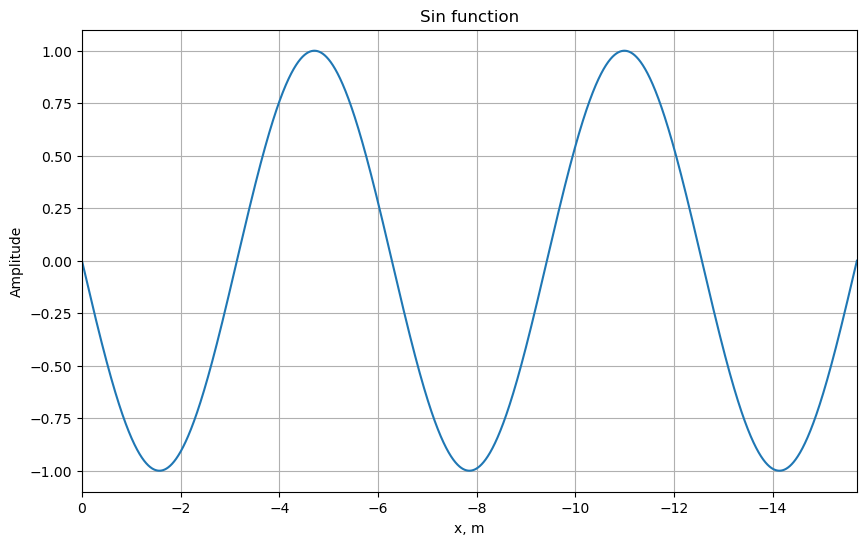

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

# 参数
xmin = 5 * pi
xmax = -5 * pi
nx = 10001
dx = (xmax - xmin) / float(nx - 1)
x = np.linspace(xmin, xmax, nx)

# 函数
f = np.sin(x)

# 画图
plt.figure(figsize=(10,6))
plt.plot(x, f)
plt.title('Sin function')
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.xlim((0, xmax))
plt.grid()
plt.show()

### 一阶导

1. 中心有限差分导数

$$
f'(x) = \frac{f(x+dx) - f(x-dx)}{2dx}
$$

2. 解析解

$$
f'(x) = k \cos(kx)
$$

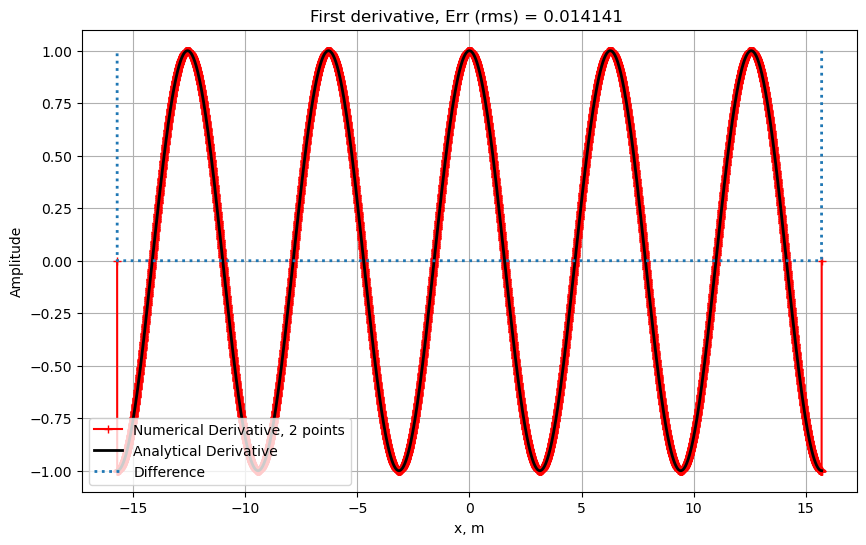

In [15]:
# 初始化
nder = np.zeros(nx)
ader = np.zeros(nx)

# 数值解
for i in range(1, nx - 1):
    nder[i] = (f[i+1] - f[i-1]) / (2*dx)

# 解析解
ader = np.cos(x)

# 两解的误差
rms = np.sqrt(np.mean((nder-ader)**2))

# Plotting 
# ----------------------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot (x, nder,label="Numerical Derivative, 2 points", marker='+', color="red")
plt.plot (x, ader, label="Analytical Derivative", lw=2, ls="-",color="black")
plt.plot (x, nder-ader, label="Difference", lw=2, ls=":")
plt.title("First derivative, Err (rms) = %.6f " % (rms) )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

### 有限差分网格数量设置

对于一个波长, 其应设置$n_{\lambda}$个格子

$$
n_{\lambda} = \frac{\lambda}{dx}
$$

由下图可知，划分的格子数量$n_{\lambda}$越多，数值解就越接近解析解

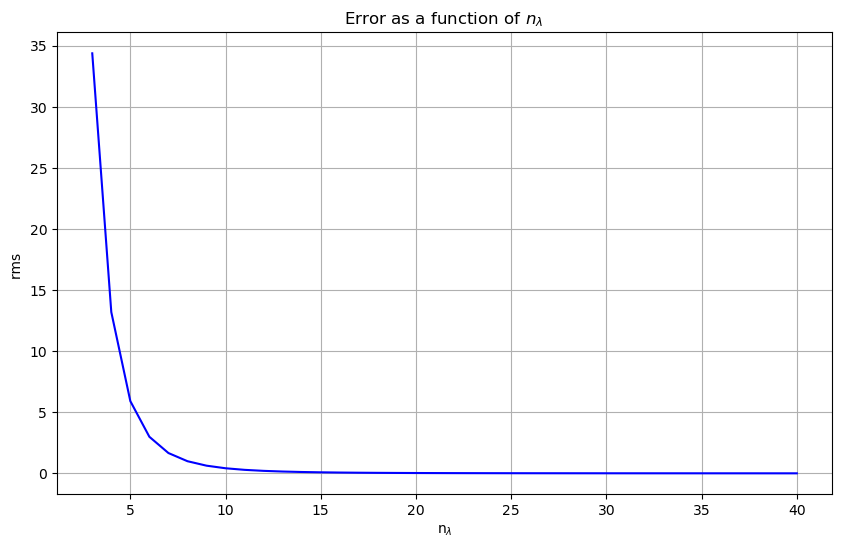

In [18]:
# Define a range of number of points per wavelength: [nmin=4,5,6 ... ,nmax=40]
# Loop over points, calculate corresponding wavelength and calculate error

# Initialize vectors
nmin=3
nmax=40
na =  np.zeros(nmax-nmin+1)    # Vector with number of points per wavelength
err = np.zeros(nmax-nmin+1)    # Vector with error

j = -1  # array index


# Loop through finite-difference derivative calculation
for n in range (nmin,nmax+1):
    
    j = j+1   # array index
    na[j] = n

    
    # Initialize sin function
    l = na[j]*dx  # wavelength
    k = 2*pi/l    # wavenumber
    f = np.sin(k*x)

    # Numerical derivative of the sin function
    for i in range (1, nx-1):
        nder[i]=(f[i+1]-f[i-1])/(2*dx)

    # Analytical derivative of the sin function
    ader= k * np.cos(k*x)   
    # Exclude boundaries
    ader[0]=0.
    ader[nx-1]=0.

    # Error (rms) 
    err[j] = np.sum((nder-ader)**2)/np.sum((ader**2)) * 100

# ----------------------------------------------------------------
# Plotting error as function of number of points per wavelength
plt.figure(figsize=(10,6))
plt.plot(na,err, ls='-', color="blue")
plt.title('Error as a function of $n_\lambda$ ')
plt.xlabel('n$_\lambda$')
plt.ylabel('rms ')
plt.grid()
plt.show()